In [65]:
#%pip install datasets
#%pip install pydub
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import tensorflow as tf

import librosa
import librosa.display
import IPython.display as ipd

from glob import glob
from IPython.display import Audio
from itertools import cycle
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])
plt.style.use('ggplot')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [66]:
TESS = './dataset/TESS Toronto emotional speech set data/'
RAVDESS = './dataset/RAVDESS/'
CREMA = './dataset/CREMA-D/'
SAVEE = './dataset/SAVEE/'
JL = './dataset/JL corpus/'
EMOV = './dataset/EMOV/'
ESD = './dataset/ESD/'
# ESD_F = '/ESD-F/'
# ASVP_ESD = '/ASVP-ESD/'
# DESD = '/DESD-E/'

In [67]:

# Specify the directory containing the TESS dataset

# Fetch list of directories in the TESS dataset
tess_dir_list = os.listdir(TESS)
path_list = []
gender_list = []
emotion_list = []

# Define emotion mappings
emotion_dic = {
    'happy'   : 'happy',
    'neutral' : 'neutral',
    'sad'     : 'sad',
    'Sad'     : 'sad',
    'angry'   : 'angry',
    'fear'    : 'fear',
    'disgust' : 'disgust',
}

# Process each directory and audio file in TESS
for directory in tess_dir_list:
    audio_files = os.listdir(os.path.join(TESS, directory))
    for audio_file in audio_files:
        # Split file name and extract emotion key
        part = audio_file.split('.')[0]
        parts = part.split('_')
        
        # Ensure there are at least 3 parts (filename format: "ID_emotion_num.wav")
        if len(parts) > 2:  
            key = parts[2]  # Extract the emotion part (third part of the filename)
            if key in emotion_dic:  # Check if the extracted emotion exists in the dictionary
                path_list.append(f"{TESS}/{directory}/{audio_file}")
                gender_list.append('female')  # TESS is a female-only dataset
                emotion_list.append(emotion_dic[key])
        else:
            print(f"Skipping file with unexpected format: {audio_file}")  # Optionally log or print skipped files

# Create DataFrame
tess_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

# Limit to 200 instances per emotion
emotions_to_limit = ['angry', 'happy', 'neutral', 'sad']

for emotion in emotions_to_limit:
    emotion_rows = tess_df[(tess_df['sex'] == 'female') & (tess_df['emotion'] == emotion)]
    
    # If there are more than 200 instances, remove some
    if len(emotion_rows) > 200:
        # Get the indices of the instances to remove
        indices_to_remove = emotion_rows.sample(len(emotion_rows) - 200).index
        
        # Drop these instances
        tess_df = tess_df.drop(indices_to_remove)

# View the first few rows of the DataFrame
print(tess_df.head())

# View emotion distribution
print(tess_df['emotion'].value_counts())


                                                path     sex  emotion
0  ./dataset/TESS Toronto emotional speech set da...  female  disgust
1  ./dataset/TESS Toronto emotional speech set da...  female  disgust
2  ./dataset/TESS Toronto emotional speech set da...  female  disgust
3  ./dataset/TESS Toronto emotional speech set da...  female  disgust
4  ./dataset/TESS Toronto emotional speech set da...  female  disgust
emotion
disgust    400
fear       400
happy      200
sad        200
neutral    200
angry      200
Name: count, dtype: int64


In [68]:
ravdess_dir_lis = os.listdir(RAVDESS)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    '03' : 'happy',
    '01' : 'neutral',
    '04' : 'sad',
    '05' : 'angry',
    '06' : 'fear',
    '07' : 'disgust',
}

for directory in ravdess_dir_lis:
    actor_files = os.listdir(os.path.join(RAVDESS, directory))
    for audio_file in actor_files:
        part = audio_file.split('.')[0]
        key = part.split('-')[1]
        if key in emotion_dic:
            gender_code = int(part.split('-')[6])
            path_list.append(f"{RAVDESS}{directory}/{audio_file}")
            gender_list.append('female' if gender_code & 1 == 0 else 'male')
            emotion_list.append(emotion_dic[key])

ravdess_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

ravdess_df.head()


IndexError: list index out of range

In [ ]:
crema_dir_list = os.listdir(CREMA)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'HAP' : 'happy',
    'NEU' : 'neutral',
    'SAD' : 'sad',
    'ANG' : 'angry',
    'FEA' : 'fear',
    'DIS' : 'disgust',
}

female_id_list = [
    '1002', '1003', '1004', '1006', '1007', '1008', '1009', '1010', '1012', '1013', '1018',
    '1020', '1021', '1024', '1025', '1028', '1029', '1030', '1037', '1043', '1046', '1047',
    '1049', '1052', '1053', '1054', '1055', '1056', '1058', '1060', '1061', '1063', '1072',
    '1073', '1074', '1075', '1076', '1078', '1079', '1082', '1084', '1089', '1091',
]

for audio_file in crema_dir_list:
    part = audio_file.split('_')
    key = part[2]
    if key in emotion_dic:
        path_list.append(f"{CREMA}{audio_file}")
        gender_list.append('female' if part[0] in female_id_list else 'male')
        emotion_list.append(emotion_dic[key])

crema_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

crema_df.head()


,path,sex,emotion
0,./dataset/CREMA-D/1022_ITS_ANG_XX.wav,male,angry
1,./dataset/CREMA-D/1037_ITS_ANG_XX.wav,female,angry
2,./dataset/CREMA-D/1060_ITS_NEU_XX.wav,female,neutral
3,./dataset/CREMA-D/1075_ITS_NEU_XX.wav,female,neutral
4,./dataset/CREMA-D/1073_IOM_DIS_XX.wav,female,disgust


In [38]:
savee_dir_list = os.listdir(SAVEE)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'h'  : 'happy',
    'n'  : 'neutral',
    'sa' : 'sad',
    'a'  : 'angry',
    'f'  : 'fear',
    'd'  : 'disgust'
}

for audio_file in savee_dir_list:
    part = audio_file.split('_')[1]
    key = part[:-6]
    if key in emotion_dic:
        path_list.append(f"{SAVEE}{audio_file}")
        gender_list.append('male') # male only dataset
        emotion_list.append(emotion_dic[key])

savee_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

savee_df.head()


,path,sex,emotion
0,./dataset/SAVEE/JK_sa01.wav,male,sad
1,./dataset/SAVEE/JK_sa15.wav,male,sad
2,./dataset/SAVEE/DC_n13.wav,male,neutral
3,./dataset/SAVEE/DC_n07.wav,male,neutral
4,./dataset/SAVEE/JK_n20.wav,male,neutral


In [7]:
# savee_dir_list = os.listdir(SAVEE)
# path_list = []
# gender_list = []
# emotion_list = []

# emotion_dic = {
#     'h'  : 'happy',
#     'n'  : 'neutral',
#     'sa' : 'sad',
#     'a'  : 'angry',
#     'f'  : 'fear',
#     'd'  : 'disgust'
# }

# for audio_file in savee_dir_list:
#     part = audio_file.split('_')[1]
#     key = part[:-6]
#     if key in emotion_dic:
#         path_list.append(f"{SAVEE}{audio_file}")
#         gender_list.append('male') # male only dataset
#         emotion_list.append(emotion_dic[key])

# savee_df = pd.concat([
#     pd.DataFrame(path_list, columns=['path']),
#     pd.DataFrame(gender_list, columns=['sex']),
#     pd.DataFrame(emotion_list, columns=['emotion'])
# ], axis=1)

# savee_df.head()

In [ ]:


# Specify the directory containing the JL dataset


# Fetch list of audio files in the JL dataset
JL_dir_list = os.listdir(JL)
path_list = []
gender_list = []
emotion_list = []

# Define emotion mappings
emotion_dic = {
    'happy'   : 'happy',
    'sad'     : 'sad',
    'angry'   : 'angry',
    'neutral' : 'neutral',
    'excited' : 'happy',
}

# Process each audio file
for audio_file in JL_dir_list:
    parts = audio_file.split('_')
    
    # Ensure there are enough parts in the filename (at least 2 parts: gender and emotion)
    if len(parts) > 1:
        gender = parts[0]
        emotion = parts[1]
        
        # Check if the emotion is valid
        if emotion in emotion_dic:
            path_list.append(f"{JL}/{audio_file}")  # Correct path construction
            
            # Assign gender to 'female' or 'male' explicitly
            if gender == 'female':
                gender_list.append('female')
            elif gender == 'male':
                gender_list.append('male')
            else:
                print(f"Skipping file with unexpected gender: {audio_file}")
                continue  # Skip files with unexpected gender
            
            # Append the mapped emotion to the list
            emotion_list.append(emotion_dic[emotion])
        else:
            print(f"Skipping file with unknown emotion: {audio_file}")
    else:
        print(f"Skipping file with unexpected format: {audio_file}")

# Create DataFrame
JL_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

# Display the first few rows
print(JL_df.head())


Skipping file with unexpected format: Picture Stimuli
Skipping file with unknown emotion: .DS_Store
Skipping file with unexpected format: Corpus Setup.docx
Skipping file with unexpected format: README.md
Skipping file with unexpected format: Recording Context.docx
Skipping file with unexpected format: Raw JL corpus (unchecked and unannotated)
Empty DataFrame
Columns: [path, sex, emotion]
Index: []


In [53]:


# Specify the directory containing the EMOV dataset

# Fetch list of audio files in the EMOV dataset
emov_dir_list = os.listdir(EMOV)
path_list = []
gender_list = []
emotion_list = []

# Define emotion mappings
emotion_dic = {
    'disgust'   : 'disgust',
    'anger'     : 'angry',  # Corrected to match the emotion dictionary
}

# Process each audio file
for audio_file in emov_dir_list:
    parts = audio_file.split('_')
    
    # Ensure there are at least 2 parts in the filename (gender_emotion_number)
    if len(parts) > 1:
        gender = parts[0]  # First part is assumed to be gender
        emotion = parts[1]  # Second part is assumed to be emotion
        
        # Check if the emotion is valid according to the emotion dictionary
        if emotion in emotion_dic:
            path_list.append(f"{EMOV}/{audio_file}")  # Correct path construction
            
            # Explicitly check for gender
            if gender == 'female':
                gender_list.append('female')
            elif gender == 'male':
                gender_list.append('male')
            else:
                print(f"Skipping file with unexpected gender: {audio_file}")
                continue  # Skip files with unexpected gender
            
            # Append the mapped emotion to the list
            emotion_list.append(emotion_dic[emotion])
        else:
            print(f"Skipping file with unknown emotion: {audio_file}")
    else:
        print(f"Skipping file with unexpected format: {audio_file}")

# Create DataFrame
EMOV_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)


# Display the first few rows
print(EMOV_df.head())


Skipping file with unknown emotion: .DS_Store
Skipping file with unexpected format: sam
Skipping file with unexpected format: jenie
Skipping file with unexpected format: cmuarctic.data
Skipping file with unexpected format: bea
Skipping file with unexpected format: josh
Empty DataFrame
Columns: [path, sex, emotion]
Index: []


In [54]:


# Fetch list of audio files in the ESD dataset
ESD_dir_list = os.listdir(ESD)
path_list = []
gender_list = []
emotion_list = []

# Define emotion mappings
emotion_dic = {
    'happy'   : 'happy',
    'angry'   : 'angry',
    'anger'   : 'angry',
    'neutral' : 'neutral',
    'sad'     : 'sad'
}

# Process each audio file
for audio_file in ESD_dir_list:
    parts = audio_file.split('_')
    
    # Ensure there are at least 2 parts in the filename (gender_emotion_number)
    if len(parts) > 1:
        gender = parts[0]  # First part is assumed to be gender
        emotion = parts[1]  # Second part is assumed to be emotion
        
        # Check if the emotion is valid according to the emotion dictionary
        if emotion in emotion_dic:
            path_list.append(f"{ESD}/{audio_file}")  # Correct path construction
            
            # Explicitly check for gender
            if gender == 'female':
                gender_list.append('female')
            elif gender == 'male':
                gender_list.append('male')
            else:
                print(f"Skipping file with unexpected gender: {audio_file}")
                continue  # Skip files with unexpected gender
            
            # Append the mapped emotion to the list
            emotion_list.append(emotion_dic[emotion])
        else:
            print(f"Skipping file with unknown emotion: {audio_file}")
    else:
        print(f"Skipping file with unexpected format: {audio_file}")

# Create DataFrame
ESD_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

# Display the first few rows
print(ESD_df.head())


Skipping file with unexpected format: Bonus
Skipping file with unknown emotion: .DS_Store
Skipping file with unexpected format: Audio
Empty DataFrame
Columns: [path, sex, emotion]
Index: []


In [ ]:


# Specify the directory containing the ESD_F dataset
ESD_F = "/Users/phil/Desktop/CNN_LSTM/TESS Toronto emotional speech set data"  # Update with the actual path to your ESD_F dataset

# Fetch the list of audio files in the ESD_F dataset
ESD_F_dir_list = os.listdir(ESD_F)
path_list = []
gender_list = []
emotion_list = []

# Define emotion mappings
emotion_dic = {
    'happy'   : 'happy',
    'angry'   : 'angry',
    'anger'   : 'angry',
    'neutral' : 'neutral',
    'sad'     : 'sad'
}

# Process each audio file
for audio_file in ESD_F_dir_list:
    parts = audio_file.split('_')  # Split the filename by '_'
    
    # Ensure there are at least 2 parts in the filename (gender_emotion_number)
    if len(parts) > 1:
        gender = parts[0]  # First part is assumed to be gender
        emotion = parts[1]  # Second part is assumed to be emotion
        
        # Check if the emotion is valid according to the emotion dictionary
        if emotion in emotion_dic:
            path_list.append(f"{ESD_F}/{audio_file}")  # Correct path construction
            
            # Explicitly check for gender
            if gender == 'female':
                gender_list.append('female')
            elif gender == 'male':
                gender_list.append('male')
            else:
                print(f"Skipping file with unexpected gender: {audio_file}")
                continue  # Skip files with unexpected gender
            
            # Append the mapped emotion to the list
            emotion_list.append(emotion_dic[emotion])
        else:
            print(f"Skipping file with unknown emotion: {audio_file}")
    else:
        print(f"Skipping file with unexpected format: {audio_file}")

# Create DataFrame
ESD_F_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

# Display the first few rows
print(ESD_F_df.head())


In [57]:
# Combine all datasets

df = pd.concat([
    tess_df,
    crema_df,
    savee_df,
], axis=0)
df.tail()

,path,sex,emotion
415,./dataset/SAVEE/JK_n11.wav,male,neutral
416,./dataset/SAVEE/JK_n05.wav,male,neutral
417,./dataset/SAVEE/JE_a01.wav,male,angry
418,./dataset/SAVEE/JE_a15.wav,male,angry
419,./dataset/SAVEE/DC_n22.wav,male,neutral


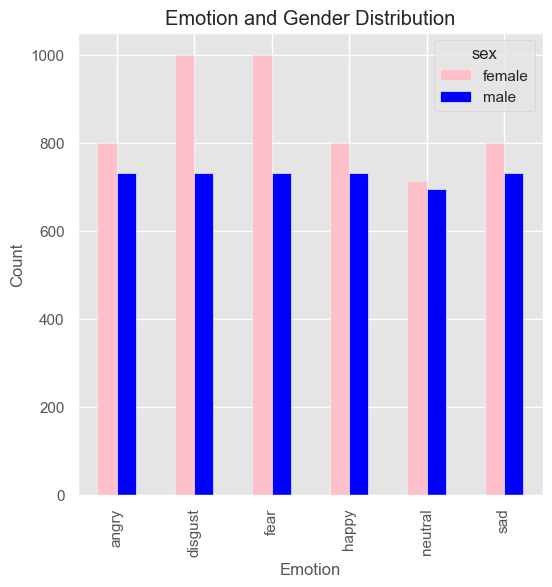

In [58]:
# Preprocessing

def plot_distribution(df):
    countTable = df.groupby(['emotion', 'sex']).count()
    pivotTable = countTable.pivot_table(index='emotion', columns='sex', values='path')

    pivotTable.plot(kind='bar', figsize=(6, 6), color=['pink', 'blue'])
    plt.title('Emotion and Gender Distribution')
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.show()

plot_distribution(df)

In [59]:
df['sex'].value_counts()

sex
female    5112
male      4350
Name: count, dtype: int64

In [60]:
df.drop('sex', axis=1, inplace=True)
df.head()

,path,emotion
0,./dataset/TESS Toronto emotional speech set da...,disgust
1,./dataset/TESS Toronto emotional speech set da...,disgust
2,./dataset/TESS Toronto emotional speech set da...,disgust
3,./dataset/TESS Toronto emotional speech set da...,disgust
4,./dataset/TESS Toronto emotional speech set da...,disgust


In [79]:
from pydub import AudioSegment, effects

# Emotion to integer mapping
emotion_dic = {
    'neutral' : 0,
    'happy'   : 1,
    'sad'     : 2,
    'angry'   : 3,
    'fear'    : 4,
    'disgust' : 5
}

def encode(label):
    """Encodes emotion label to integer."""
    # Return the corresponding emotion integer or None if not found
    encoded = emotion_dic.get(label, None)
    
    if encoded is None:
        print(f"Warning: Emotion '{label}' not found in the dictionary!")
    
    return encoded


## Feature Extraction

In [80]:
import numpy as np
import librosa
import random
from tqdm import tqdm

# NOISE
def noise(data):
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.9):
    return librosa.effects.time_stretch(data,rate=rate)

# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-2, high=2) * 1000)
    return np.roll(data, shift_range)



# Combined Augmentation Function
def augment_audio(data, sr):
    augmentations = [noise, stretch, shift]  # List of augmentation functions
    applied_augmentations = random.sample(augmentations, random.randint(1, 3))

    for augmentation in applied_augmentations:
        data = augmentation(data)

    return data

# Example of using the augment_audio function
def preprocess_audio(path):
    raw_audio, sr = librosa.load(path,sr=16000)
    trimmed, _ = librosa.effects.trim(raw_audio, top_db=25, frame_length=256, hop_length=64)
    raw_audio = augment_audio(trimmed, sr)
    audio_duration=len(raw_audio)/sr
    if audio_duration > 4:
        raw_audio=raw_audio[:4*sr]
    else:
        raw_audio = np.pad(raw_audio, (0, (4*sr)-len(raw_audio)), 'constant')


    return raw_audio, sr


def preprocess_audio_aug(path):
    raw_audio, sr = librosa.load(path,sr=16000)
    trimmed, _ = librosa.effects.trim(raw_audio, top_db=25, frame_length=256, hop_length=64)
    raw_audio = augment_audio(trimmed, sr)
    audio_duration = len(raw_audio)/sr
    if audio_duration > 4:
        raw_audio = raw_audio[:4*sr]
    else:
        raw_audio = np.pad(raw_audio, (0, (4*sr)-len(raw_audio)), 'constant')


    return raw_audio, sr

# normal
def preprocess_audio_n(path):
    raw_audio, sr = librosa.load(path,sr=16000)
    raw_audio, _ = librosa.effects.trim(raw_audio, top_db=25, frame_length=256, hop_length=64)
    audio_duration = len(raw_audio)/sr
    if audio_duration > 4:
        raw_audio = raw_audio[:4*sr]
    else:
        raw_audio = np.pad(raw_audio, (0, (4*sr)-len(raw_audio)), 'constant')


    return raw_audio, sr

In [81]:
zcr_list = []
rms_list = []
mfccs_list = []
emotion_list = []

FRAME_LENGTH = 400
HOP_LENGTH = 160
sr=16000

# 20 mfcc features + 1 zcr + 1 rms
for row in tqdm(df.itertuples(index=False)):
    try:
        # normal preprocessing 
        y,_= preprocess_audio_n(row.path)

        zcr = librosa.feature.zero_crossing_rate(y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        rms = librosa.feature.rms(y=y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20, hop_length=HOP_LENGTH)

        zcr_list.append(zcr)
        rms_list.append(rms)
        mfccs_list.append(mfccs)

        emotion_list.append(encode(row.emotion))

        # augmentated preprocessing 
        y,_= preprocess_audio_aug(row.path)

        zcr = librosa.feature.zero_crossing_rate(y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        rms = librosa.feature.rms(y=y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20, hop_length=HOP_LENGTH)

        zcr_list.append(zcr)
        rms_list.append(rms)
        mfccs_list.append(mfccs)

        emotion_list.append(encode(row.emotion))


        # oversample augmentated preprocessing for fear and disgust
        if row.emotion == "fear" and np.random.rand() <= 0.5 or row.emotion == "disgust" and np.random.rand() <= 0.3:
            y,_= preprocess_audio_aug(row.path)

            zcr = librosa.feature.zero_crossing_rate(y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
            rms = librosa.feature.rms(y=y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
            mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20, hop_length=HOP_LENGTH)

            zcr_list.append(zcr)
            rms_list.append(rms)
            mfccs_list.append(mfccs)

            emotion_list.append(encode(row.emotion))

        # y,_= preprocess_audio(row.path)

        # zcr = librosa.feature.zero_crossing_rate(y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        # rms = librosa.feature.rms(y=y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        # mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20, hop_length=HOP_LENGTH)

        # zcr_list.append(zcr)
        # rms_list.append(rms)
        # mfccs_list.append(mfccs)

        # emotion_list.append(encode(row.emotion))
    except:
        print(f"Failed for path: {row.path}")

9462it [07:21, 21.41it/s]


In [64]:
#Check shape
mfccs_list[7].shape

(20, 401)

## Train test split

In [85]:
# combining the different features
X = np.concatenate((zcr_list,rms_list,mfccs_list),axis=1)
X = X.astype('float32')

y = np.asarray(emotion_list)
y = np.expand_dims(y, axis=1).astype('int8')
print(len(y))

20287


In [86]:
# save features
np.save('X_Extract.npy', X)
np.save('Y_Extract.npy', y)

In [71]:
# load features
X = np.load('X_Extract.npy')
# y = np.load('Y_Extract.npy')

In [72]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras import layers, optimizers, callbacks

In [88]:
# print(f"Shape of X: {X.shape}")
# print(f"Shape of y: {y.shape}")
# if len(X) != len(y):
#     print("X and y are misaligned.")


X_train, X_to_split, y_train, y_to_split = train_test_split(X, y, test_size=0.08, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_to_split, y_to_split, test_size=0.3, random_state=1)

y_val_class = to_categorical(y_val, 6)
y_test_class = to_categorical(y_test, 6)
y_train_class = to_categorical(y_train, 6)

X_train.shape

(18664, 22, 401)

## Metric setup


In [89]:
def summarize_history_accuracy(history):

  plt.figure(figsize=(12, 6))

  # Accuracy subplot
  plt.subplot(1, 2, 1)
  plt.plot(history.history['categorical_accuracy'])
  plt.plot(history.history['val_categorical_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')

  # Loss subplot
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')

  plt.tight_layout()
  plt.show()

from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(xv, yv, MODEL):
    y_pred = np.argmax(MODEL.predict(xv), axis=1)
    labels = ['neutral', 'happy', 'sad', 'angry', 'fear', 'disgust']
    cm = confusion_matrix(np.argmax(yv, axis=1), y_pred, labels=range(6))

    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion matrix')
    plt.show()

from tensorflow.keras.metrics import Precision, Recall, F1Score


def model_info(model, test_x, test_y):
    # Evaluate the model on validation data and get predictions
    loss, accuracy = model.evaluate(test_x, test_y)
    print("Validation Loss:", loss)
    print("Validation Accuracy:", accuracy)

    # Create metric objects
    precision = Precision(name='precision')
    recall = Recall(name='recall')
    f1_score = F1Score(name='f1_score')

    # Get model predictions
    y_pred = model.predict(test_x)

    # Update metrics with true labels and predictions
    precision.update_state(test_y, y_pred)
    recall.update_state(test_y, y_pred)
    f1_score.update_state(test_y, y_pred)

    # Print calculated metrics
    print("Precision:", precision.result().numpy())
    print("Recall:", recall.result().numpy())

    # Calculate and print F1-score for each class
    f1_scores = f1_score.result().numpy()
    emotion_labels = ['neutral', 'happy', 'sad', 'angry', 'fear', 'disgust']  # Replace with your actual labels

    for i, emotion in enumerate(emotion_labels):
        print(f"F1-Score ({emotion}):", f1_scores[i])

In [90]:
# Callbacks
# Reduce learning rate when validation categorical accuracy does not improve for 'patience' epochs
# The learning rate will be reduced by a 'factor' of 0.5 (50% reduction)
rlrop = callbacks.ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5, patience=10, min_lr=1e-6, verbose=1)

# Early stopping to halt training when the validation loss doesn't improve for 'patience' epochs
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)

## Audio test setup

In [91]:
path = 'OAF_back_angry.wav'


def preprocess_audio(path):
    raw_audio, sr = librosa.load(path,sr=16000)
    raw_audio, _ = librosa.effects.trim(raw_audio, top_db=25, frame_length=256, hop_length=64)
    audio_duration=len(raw_audio)/sr
    if audio_duration > 4:
        raw_audio=raw_audio[:4*sr]
    else:
        raw_audio = np.pad(raw_audio, (0, (4*sr)-len(raw_audio)), 'constant')


    return raw_audio, sr



zcr_list = []
rms_list = []
mfccs_list = []
emotion_list = []

FRAME_LENGTH = 400
HOP_LENGTH = 160
sr=16000


y,_= preprocess_audio(path)
zcr = librosa.feature.zero_crossing_rate(y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
rms = librosa.feature.rms(y=y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=25, hop_length=HOP_LENGTH)

zcr_list.append(zcr)
rms_list.append(rms)
mfccs_list.append(mfccs)
pda = np.concatenate((zcr_list,rms_list,mfccs_list),axis=1)
pda = pda.astype('float32')

# Model training 

## LSTM

In [92]:
# Initialize the model
MODEL = Sequential()
MODEL.add(layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1:])))
MODEL.add(layers.Dropout(0.5))  # Adding dropout for regularization
MODEL.add(layers.LSTM(64))
MODEL.add(layers.Dropout(0.5))  # Adding dropout for regularization
MODEL.add(layers.Dense(6, activation='softmax'))

# Compile the model with Adam optimizer
MODEL.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

print(MODEL.summary())

# Fit the model with the callbacks
history = MODEL.fit(X_train, y_train_class,
                    epochs=200,
                    batch_size=20,  # Increased batch size for smoother gradients
                    validation_data=(X_val, y_val_class),
                    callbacks=[rlrop, early_stopping])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 22, 64)         │       119,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 152,710 (596.52 KB)

 Trainable params: 152,710 (596.52 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/200
934/934 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - categorical_accuracy: 0.3067 - loss: 1.6165 - val_categorical_accuracy: 0.3979 - val_loss: 1.4111 - learning_rate: 0.0010
Epoch 2/200
934/934 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - categorical_accuracy: 0.3980 - loss: 1.4462 - val_categorical_accuracy: 0.4498 - val_loss: 1.3646 - learning_rate: 0.0010
Epoch 3/200
934/934 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - categorical_accuracy: 0.4318 - loss: 1.3935 - val_categorical_accuracy: 0.4639 - val_loss: 1.3230 - learning_rate: 0.0010
Epoch 4/200
934/934 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - categorical_accuracy: 0.4426 - loss: 1.3606 - val_categorical_accuracy: 0.4472 - val_loss: 1.3706 - learning_rate: 0.0010
Epoch 5/200
934/934 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - categorical_accuracy: 0.4635 - loss: 1.3277 - val_categorical_accuracy: 0.4956 - val_loss: 1.2842 - learning_rate: 0.0010
Epoch 6/200
934/934 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - categorical_accuracy: 0.4811 - loss: 1.2928

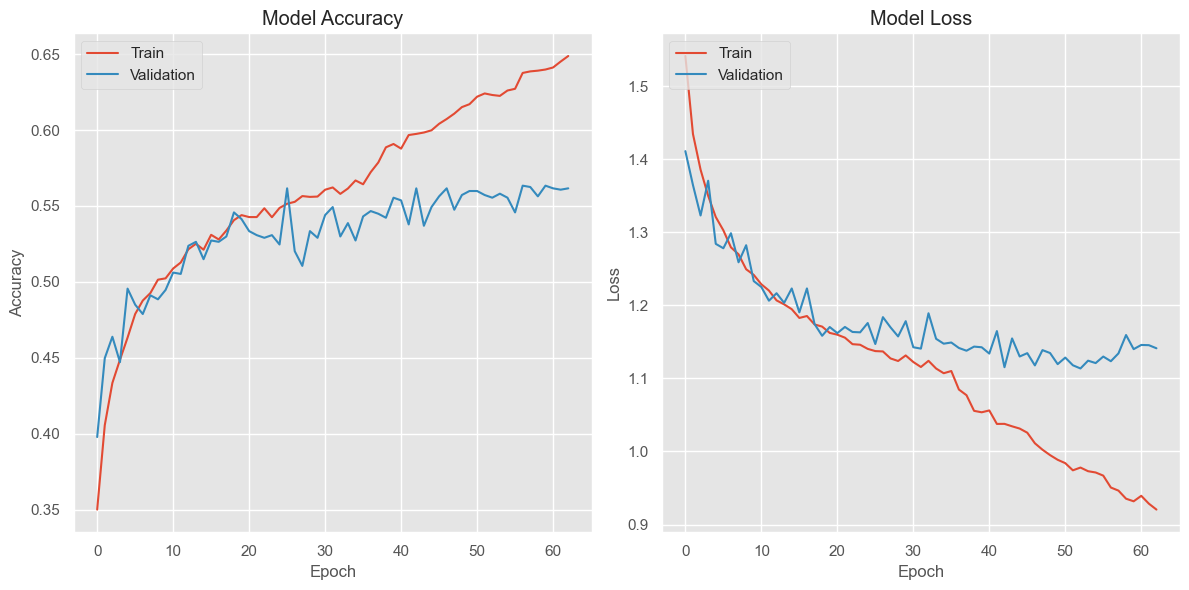

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


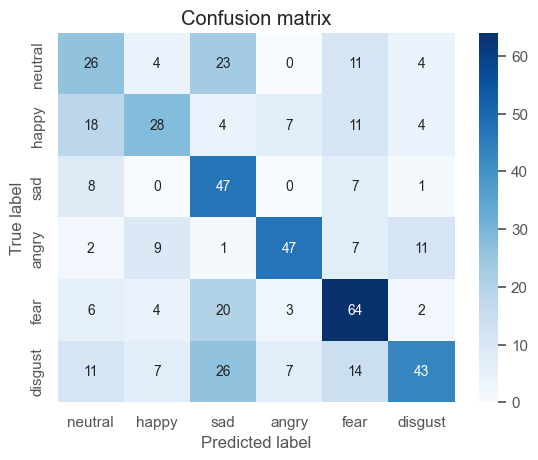

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.5061 - loss: 1.2225
Validation Loss: 1.2004603147506714
Validation Accuracy: 0.5236139893531799
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


Precision: 0.6234568
Recall: 0.4147844
F1-Score (neutral): 0.37410066
F1-Score (happy): 0.45161286
F1-Score (sad): 0.51086956
F1-Score (angry): 0.66666657
F1-Score (fear): 0.6009389
F1-Score (disgust): 0.49710977


In [93]:
summarize_history_accuracy(history)
plot_confusion_matrix(X_test, y_test_class, MODEL)
model_info(MODEL, X_test, y_test_class)
MODEL.save('model_LSTM_1_.h5')

In [94]:
pr = MODEL.predict(pda)
print(pr)
emotion_labels = ['neutral', 'happy', 'sad', 'angry', 'fear', 'disgust']
predicted_emotion = emotion_labels[np.argmax(pr)]
print(predicted_emotion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
[[4.4519162e-05 4.6556639e-03 9.2990313e-06 9.9201500e-01 2.5906493e-03
  6.8488403e-04]]
angry


In [95]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model_lstm = Sequential()
model_lstm.add(layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1:])))
model_lstm.add(layers.Dropout(0.5))  # Adding dropout for regularization
model_lstm.add(layers.LSTM(64, return_sequences=True))
model_lstm.add(layers.Dropout(0.5))  # Adding dropout for regularization
model_lstm.add(layers.LSTM(64, return_sequences=True))
model_lstm.add(layers.Dropout(0.5))  # Adding dropout for regularization
model_lstm.add(layers.LSTM(64))
model_lstm.add(layers.Dropout(0.5))  # Adding dropout for regularization

model_lstm.add(layers.Dense(128, activation='relu'))
model_lstm.add(layers.Dropout(0.5))  # Adding dropout for regularization
model_lstm.add(layers.Dense(64, activation='relu'))
model_lstm.add(layers.Dropout(0.5))  # Adding dropout for regularization
model_lstm.add(layers.Dense(6, activation='softmax'))

opt = optimizers.Adam(clipvalue=0.5)  # clipvalue to prevent exploding gradients
model_lstm.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])
print(model_lstm.summary())
history = model_lstm.fit(X_train, y_train_class,epochs=200, validation_data=(X_val, y_val_class), batch_size=64, callbacks=[rlrop, early_stopping])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 22, 64)         │       119,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 22, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 22, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 22, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 22, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 22, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,334 (919.27 KB)

 Trainable params: 235,334 (919.27 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/200
292/292 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - categorical_accuracy: 0.2388 - loss: 1.7070 - val_categorical_accuracy: 0.3116 - val_loss: 1.5324 - learning_rate: 0.0010
Epoch 2/200
292/292 ━━━━━━━━━━━━━━━━━━━━ 16s 56ms/step - categorical_accuracy: 0.2941 - loss: 1.5810 - val_categorical_accuracy: 0.3424 - val_loss: 1.4921 - learning_rate: 0.0010
Epoch 3/200
292/292 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - categorical_accuracy: 0.3500 - loss: 1.5183 - val_categorical_accuracy: 0.3820 - val_loss: 1.4300 - learning_rate: 0.0010
Epoch 4/200
292/292 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - categorical_accuracy: 0.3887 - loss: 1.4624 - val_categorical_accuracy: 0.4261 - val_loss: 1.3831 - learning_rate: 0.0010
Epoch 5/200
292/292 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - categorical_accuracy: 0.4047 - loss: 1.4355 - val_categorical_accuracy: 0.4287 - val_loss: 1.3503 - learning_rate: 0.0010
Epoch 6/200
292/292 ━━━━━━━━━━━━━━━━━━━━ 16s 56ms/step - categorical_accuracy: 0.4295 - loss: 1.3978

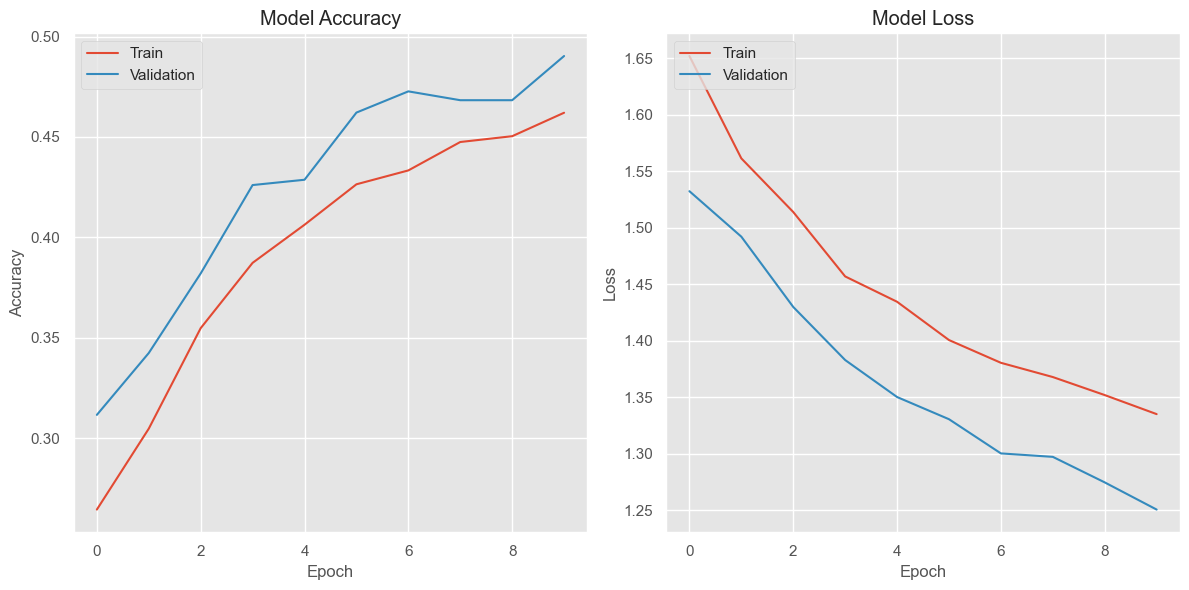

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


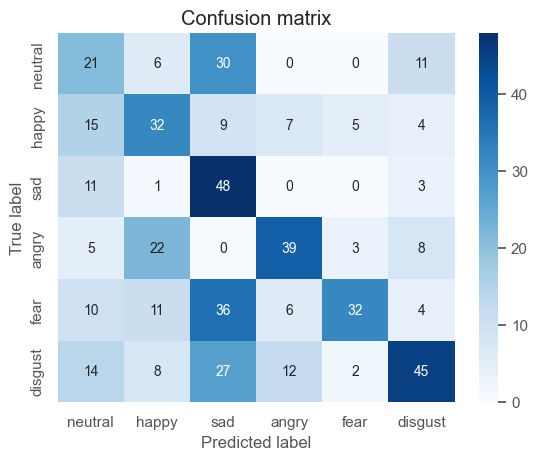

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - categorical_accuracy: 0.4530 - loss: 1.3113
Validation Loss: 1.3088005781173706
Validation Accuracy: 0.4455852210521698
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


Precision: 0.75
Recall: 0.20328543
F1-Score (neutral): 0.2916666
F1-Score (happy): 0.42105258
F1-Score (sad): 0.45070416
F1-Score (angry): 0.55319136
F1-Score (fear): 0.45390064
F1-Score (disgust): 0.49180323
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
[[2.5945783e-06 5.4205790e-02 1.0134749e-05 1.5069234e-01 7.9299855e-01
  2.0905533e-03]]
fear


In [96]:
summarize_history_accuracy(history)
plot_confusion_matrix(X_test, y_test_class, model_lstm)
model_info(model_lstm, X_test, y_test_class)
MODEL.save('model_LSTM_2_.h5')

pr = model_lstm.predict(pda)
print(pr)
emotion_labels = ['neutral', 'happy', 'sad', 'angry', 'fear', 'disgust']
predicted_emotion = emotion_labels[np.argmax(pr)]
print(predicted_emotion)

## GRU

In [97]:
from tensorflow import keras
from tensorflow.keras.layers import GRU, Dropout, Dense

model_GRU = keras.Sequential([
  keras.layers.Input(shape=X_train.shape[1:]),
  keras.layers.GRU(64, return_sequences=True, dropout=0.5),  # First GRU layer
  keras.layers.BatchNormalization(),  # Normalize activations before next layer

  keras.layers.GRU(32, return_sequences=True, dropout=0.5),  # Second GRU with fewer units

  # Additional GRU layers (optional)
  keras.layers.GRU(16, return_sequences=True, dropout=0.3),  # Third GRU with even fewer units
  keras.layers.GRU(8, dropout=0.3),  # Fourth GRU layer

  # Additional normal layers (optional)
  keras.layers.Dense(64, activation='relu'),  # Dense layer with ReLU activation
  keras.layers.Dropout(0.2),  # Dropout for regularization

  keras.layers.Dense(6, activation="softmax")  # Output layer
])

model_GRU.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['categorical_accuracy'])

print(model_GRU.summary())

# Fit the model with the callbacks
history_GRU = model_GRU.fit(X_train, y_train_class,
                    epochs=200,
                    batch_size=20,  # Increased batch size for smoother gradients
                    validation_data=(X_val, y_val_class),
                    callbacks=[rlrop, early_stopping])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 22, 64)         │        89,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 22, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 22, 32)         │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 22, 16)         │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 8)              │           624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,318 (403.59 KB)

 Trainable params: 103,190 (403.09 KB)

 Non-trainable params: 128 (512.00 B)

None
Epoch 1/200
934/934 ━━━━━━━━━━━━━━━━━━━━ 27s 25ms/step - categorical_accuracy: 0.2263 - loss: 1.7458 - val_categorical_accuracy: 0.2940 - val_loss: 1.6205 - learning_rate: 0.0010
Epoch 2/200
934/934 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - categorical_accuracy: 0.2891 - loss: 1.6352 - val_categorical_accuracy: 0.3107 - val_loss: 1.5646 - learning_rate: 0.0010
Epoch 3/200
934/934 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - categorical_accuracy: 0.3119 - loss: 1.6007 - val_categorical_accuracy: 0.3565 - val_loss: 1.5301 - learning_rate: 0.0010
Epoch 4/200
934/934 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - categorical_accuracy: 0.3310 - loss: 1.5617 - val_categorical_accuracy: 0.3512 - val_loss: 1.4953 - learning_rate: 0.0010
Epoch 5/200
934/934 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - categorical_accuracy: 0.3550 - loss: 1.5251 - val_categorical_accuracy: 0.3574 - val_loss: 1.4770 - learning_rate: 0.0010
Epoch 6/200
934/934 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - categorical_accuracy: 0.3704 - loss: 1.5042

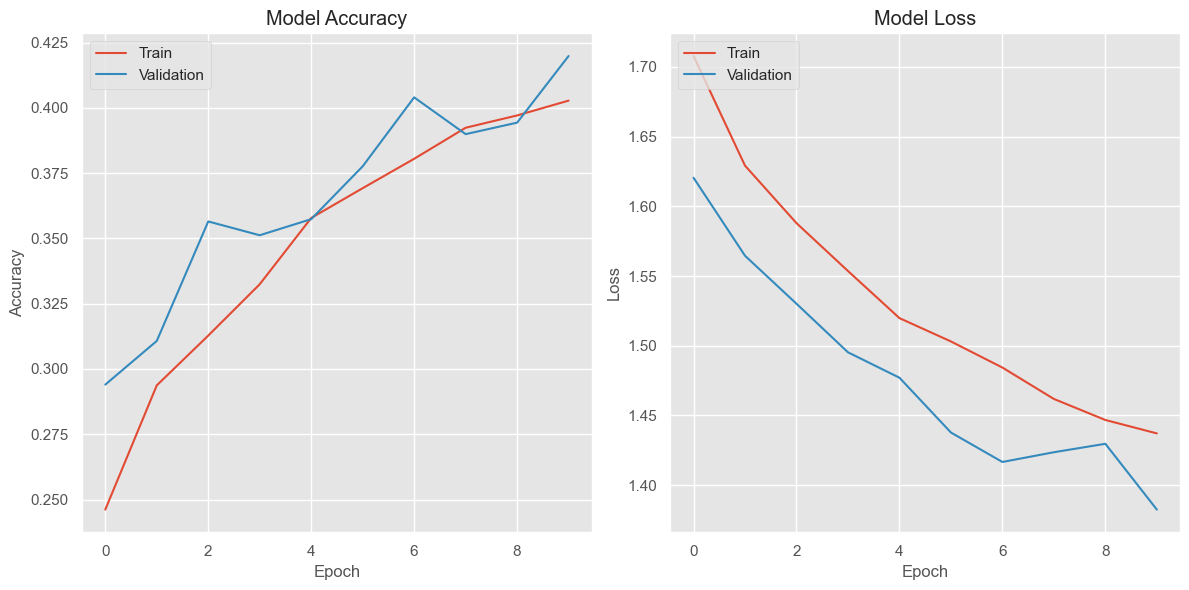

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


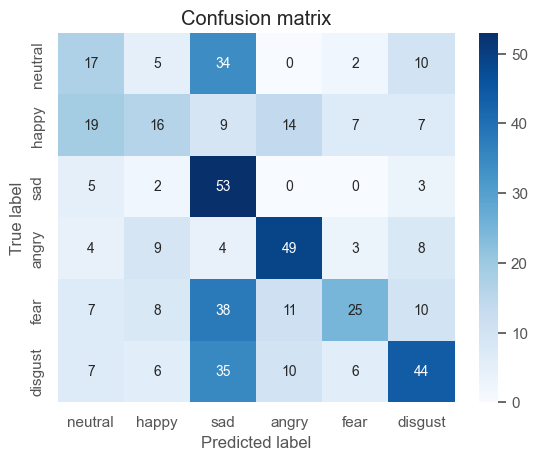

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.4067 - loss: 1.4083
Validation Loss: 1.3924813270568848
Validation Accuracy: 0.41889116168022156
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Precision: 0.7227723
Recall: 0.14989734
F1-Score (neutral): 0.26771647
F1-Score (happy): 0.27118638
F1-Score (sad): 0.4491525
F1-Score (angry): 0.6086955
F1-Score (fear): 0.35211262
F1-Score (disgust): 0.46315783
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step
[[3.4729182e-04 1.6336866e-02 9.6586176e-05 1.5695630e-02 9.6599448e-01
  1.5291818e-03]]
fear


In [98]:
summarize_history_accuracy(history_GRU)
plot_confusion_matrix(X_test, y_test_class, model_GRU )
model_info(model_GRU, X_test, y_test_class)

pr = model_GRU.predict(pda)
print(pr)
emotion_labels = ['neutral', 'happy', 'sad', 'angry', 'fear', 'disgust']
predicted_emotion = emotion_labels[np.argmax(pr)]
print(predicted_emotion)

## Bi-LSTM

In [99]:
model_lstm_bi = Sequential([
  layers.Bidirectional(layers.LSTM(64, return_sequences=True), input_shape=(X_train.shape[1:])),
  layers.Dropout(0.5),
  layers.Bidirectional(layers.LSTM(32, return_sequences=True)),
  layers.Dropout(0.5),
  layers.Bidirectional(layers.LSTM(16)),
  layers.Dropout(0.5),
  layers.Dense(128, activation='relu'),  # Dense layer with ReLU activation
  layers.Dropout(0.2),
  layers.Dense(6, activation='softmax')  # Output layer
])


# Compile the model with Adam optimizer and gradient clipping
opt = optimizers.Adam(clipvalue=0.5)  # clipvalue to prevent exploding gradients
model_lstm_bi.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])


print(model_lstm_bi.summary())

# Fit the model with the callbacks
history1 = model_lstm_bi.fit(X_train, y_train_class,
                    epochs=200,
                    batch_size=32,  # Adjusted batch size
                    validation_data=(X_val, y_val_class),
                    callbacks=[rlrop, early_stopping])


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 22, 128)        │       238,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 22, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 22, 64)         │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 22, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 32)             │        10,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 295,174 (1.13 MB)

 Trainable params: 295,174 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - categorical_accuracy: 0.2786 - loss: 1.6466 - val_categorical_accuracy: 0.3495 - val_loss: 1.4492 - learning_rate: 0.0010
Epoch 2/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 25s 43ms/step - categorical_accuracy: 0.3928 - loss: 1.4597 - val_categorical_accuracy: 0.4287 - val_loss: 1.3939 - learning_rate: 0.0010
Epoch 3/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - categorical_accuracy: 0.4170 - loss: 1.4027 - val_categorical_accuracy: 0.4754 - val_loss: 1.3156 - learning_rate: 0.0010
Epoch 4/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - categorical_accuracy: 0.4381 - loss: 1.3541 - val_categorical_accuracy: 0.4674 - val_loss: 1.3123 - learning_rate: 0.0010
Epoch 5/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - categorical_accuracy: 0.4570 - loss: 1.3410 - val_categorical_accuracy: 0.4595 - val_loss: 1.3070 - learning_rate: 0.0010
Epoch 6/200
584/584 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - categorical_accuracy: 0.4733 - loss: 1.3021

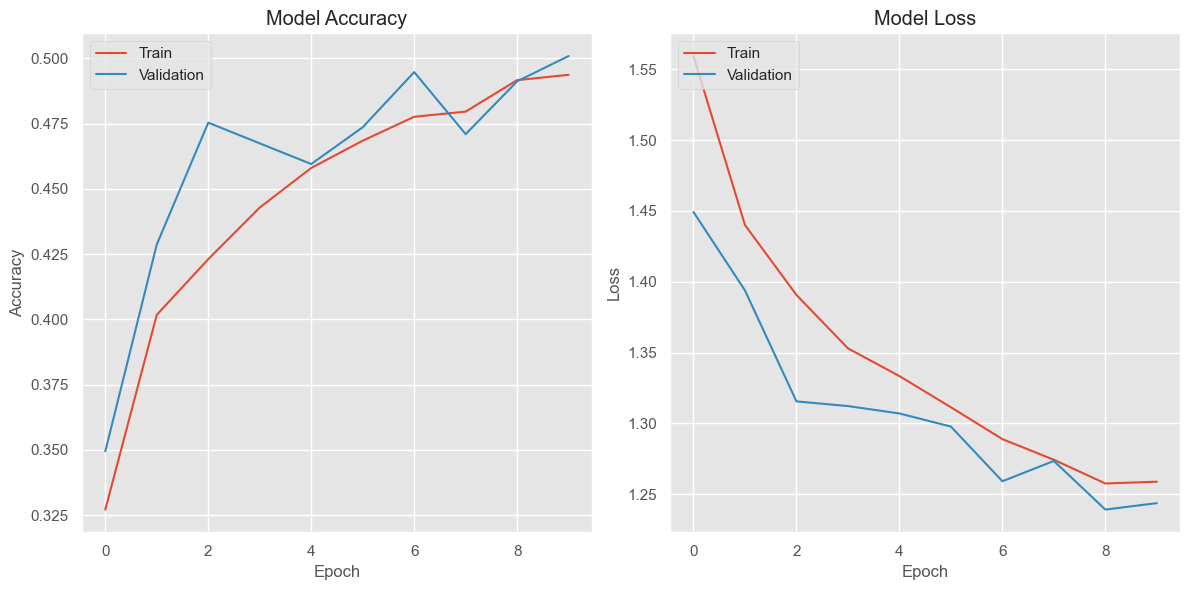

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


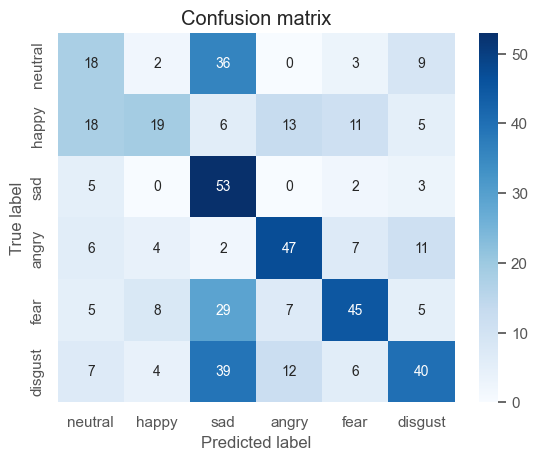

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - categorical_accuracy: 0.4518 - loss: 1.2878
Validation Loss: 1.29886794090271
Validation Accuracy: 0.4558521509170532
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Precision: 0.7093023
Recall: 0.25051335
F1-Score (neutral): 0.28346452
F1-Score (happy): 0.3486238
F1-Score (sad): 0.4649122
F1-Score (angry): 0.60256404
F1-Score (fear): 0.5202312
F1-Score (disgust): 0.4419889
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step
[[0.00097619 0.11050837 0.00100104 0.660109   0.20195127 0.02545419]]
angry


In [100]:
summarize_history_accuracy(history1)
plot_confusion_matrix(X_test, y_test_class, model_lstm_bi)
model_info(model_lstm_bi, X_test, y_test_class)

pr = model_lstm_bi.predict(pda)
print(pr)
emotion_labels = ['neutral', 'happy', 'sad', 'angry', 'fear', 'disgust']
predicted_emotion = emotion_labels[np.argmax(pr)]
print(predicted_emotion)

## CNN

In [101]:
import tensorflow.keras.layers as L

model_CNN = Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1:])),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Dropout(0.2),  # Add dropout layer after the second max pooling layer

    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Dropout(0.2),  # Add dropout layer after the fourth max pooling layer

    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    L.Dropout(0.2),  # Add dropout layer after the fifth max pooling layer

    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(6,activation='softmax')
])

opt = optimizers.Adam(clipvalue=0.5)  # clipvalue to prevent exploding gradients
model_CNN.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

print(model_CNN.summary())

history_CNN = model_CNN.fit(X_train, y_train_class,epochs=200, validation_data=(X_val, y_val_class), batch_size=64, callbacks=[rlrop, early_stopping])


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 22, 512)        │     1,027,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 22, 512)        │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 11, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 11, 512)        │     1,311,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 11, 512)        │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 6, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 6, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 6, 256)         │       655,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 3, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 3, 256)         │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 3, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 2, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 2, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 2, 128)         │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 2, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 6)              │         3,07

 Total params: 3,367,046 (12.84 MB)

 Trainable params: 3,362,694 (12.83 MB)

 Non-trainable params: 4,352 (17.00 KB)

None
Epoch 1/200
292/292 ━━━━━━━━━━━━━━━━━━━━ 42s 137ms/step - categorical_accuracy: 0.3021 - loss: 1.7973 - val_categorical_accuracy: 0.3195 - val_loss: 1.8099 - learning_rate: 0.0010
Epoch 2/200
292/292 ━━━━━━━━━━━━━━━━━━━━ 39s 133ms/step - categorical_accuracy: 0.4388 - loss: 1.3922 - val_categorical_accuracy: 0.4243 - val_loss: 1.3808 - learning_rate: 0.0010
Epoch 3/200
292/292 ━━━━━━━━━━━━━━━━━━━━ 39s 134ms/step - categorical_accuracy: 0.4841 - loss: 1.2881 - val_categorical_accuracy: 0.2949 - val_loss: 1.9234 - learning_rate: 0.0010
Epoch 4/200
292/292 ━━━━━━━━━━━━━━━━━━━━ 38s 132ms/step - categorical_accuracy: 0.5170 - loss: 1.2262 - val_categorical_accuracy: 0.3046 - val_loss: 1.6275 - learning_rate: 0.0010
Epoch 5/200
292/292 ━━━━━━━━━━━━━━━━━━━━ 38s 130ms/step - categorical_accuracy: 0.5331 - loss: 1.1684 - val_categorical_accuracy: 0.5009 - val_loss: 1.2855 - learning_rate: 0.0010
Epoch 6/200
292/292 ━━━━━━━━━━━━━━━━━━━━ 38s 129ms/step - categorical_accuracy: 0.5623 - loss: 

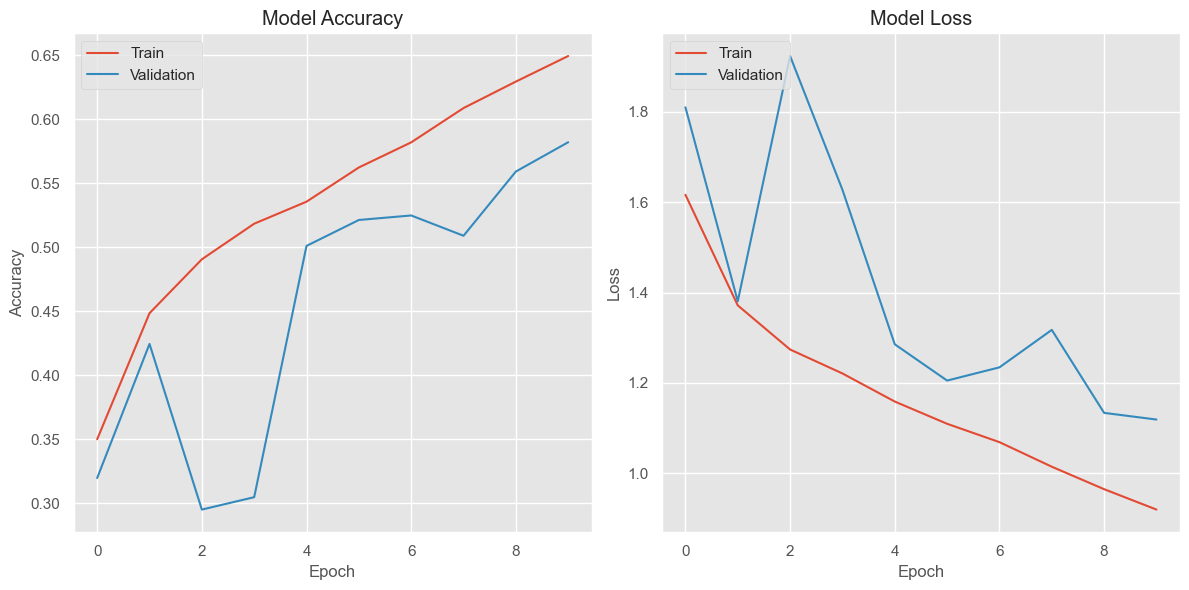

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


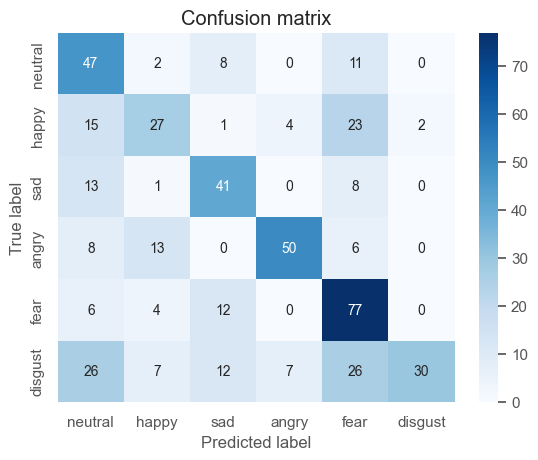

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.5632 - loss: 1.1785
Validation Loss: 1.2045034170150757
Validation Accuracy: 0.558521568775177
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Precision: 0.64705884
Recall: 0.4517454
F1-Score (neutral): 0.51366115
F1-Score (happy): 0.42857137
F1-Score (sad): 0.5985401
F1-Score (angry): 0.7246376
F1-Score (fear): 0.6159999
F1-Score (disgust): 0.4285714


2025-01-19 01:14:20.385138: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at reshape_op.h:65 : INVALID_ARGUMENT: Only one input size may be -1, not both 0 and 1
2025-01-19 01:14:20.385160: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Only one input size may be -1, not both 0 and 1
	 [[{{node sequential_4_1/flatten_1/Reshape}}]]


InvalidArgumentError: Graph execution error:

Detected at node sequential_4_1/flatten_1/Reshape defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/Users/phil/Library/Python/3.12/lib/python/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/Users/phil/Library/Python/3.12/lib/python/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/Users/phil/Library/Python/3.12/lib/python/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/Users/phil/Library/Python/3.12/lib/python/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/asyncio/base_events.py", line 618, in run_forever

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/asyncio/base_events.py", line 1951, in _run_once

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/asyncio/events.py", line 84, in _run

  File "/Users/phil/Library/Python/3.12/lib/python/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/Users/phil/Library/Python/3.12/lib/python/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/Users/phil/Library/Python/3.12/lib/python/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/Users/phil/Library/Python/3.12/lib/python/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/Users/phil/Library/Python/3.12/lib/python/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/Users/phil/Library/Python/3.12/lib/python/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/Users/phil/Library/Python/3.12/lib/python/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/Users/phil/Library/Python/3.12/lib/python/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/Users/phil/Library/Python/3.12/lib/python/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/Users/phil/Library/Python/3.12/lib/python/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Users/phil/Library/Python/3.12/lib/python/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/Users/phil/Library/Python/3.12/lib/python/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/Users/phil/Library/Python/3.12/lib/python/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/var/folders/mn/vqn3jz_159s3qbtn49__6kv40000gn/T/ipykernel_41377/1333706051.py", line 5, in <module>

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 504, in predict

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 204, in one_step_on_data_distributed

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 194, in one_step_on_data

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 92, in predict_step

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/layer.py", line 846, in __call__

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/ops/operation.py", line 48, in __call__

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/models/sequential.py", line 209, in call

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/models/functional.py", line 202, in call

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/ops/function.py", line 155, in _run_through_graph

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/models/functional.py", line 592, in call

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/layer.py", line 846, in __call__

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/ops/operation.py", line 48, in __call__

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py", line 54, in call

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/ops/numpy.py", line 4415, in reshape

  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/backend/tensorflow/numpy.py", line 1778, in reshape

Only one input size may be -1, not both 0 and 1
	 [[{{node sequential_4_1/flatten_1/Reshape}}]] [Op:__inference_one_step_on_data_distributed_570173]

In [104]:
summarize_history_accuracy(history_CNN)
plot_confusion_matrix(X_test, y_test_class, model_CNN)
model_info(model_CNN,X_test, y_test_class)

pr = model_CNN.predict(pda)
print(pr)
emotion_labels = ['neutral', 'happy', 'sad', 'angry', 'fear', 'disgust']
predicted_emotion = emotion_labels[np.argmax(pr)]
print(predicted_emotion)

## C-LSTM

In [105]:
import tensorflow.keras.layers as L

modelCLSTM = Sequential([
    L.Conv1D(1024, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1:])),
    L.MaxPooling1D(pool_size=2, strides = 2, padding = 'same'),
    L.BatchNormalization(),
    L.Dropout(0.3),

    L.Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'),
    L.MaxPooling1D(pool_size=2, strides = 2, padding = 'same'),
    L.BatchNormalization(),
    L.Dropout(0.3),

    L.Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'),
    L.MaxPooling1D(pool_size=2, strides = 2, padding = 'same'),
    L.BatchNormalization(),
    L.Dropout(0.3),

    L.LSTM(128, return_sequences=True),
    L.Dropout(0.3),

    L.LSTM(128, return_sequences=True),
    L.Dropout(0.3),
    L.LSTM(128),
    L.Dropout(0.3),

    L.Dense(128, activation='relu'),
    #L.Dropout(0.3),

    L.Dense(64, activation='relu'),
    #L.Dropout(0.3),

    L.Dense(32, activation='relu'),
    #L.Dropout(0.3),

    L.Dense(6, activation='softmax')
])


opt = optimizers.Adam(clipvalue=0.5)  # clipvalue to prevent exploding gradients
modelCLSTM.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

# Callbacks with adjusted ReduceLROnPlateau parameters for more aggressive reduction
# rlrop = callbacks.ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5, patience=10, min_lr=1e-6, verbose=1)
# early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)

print(modelCLSTM.summary())

history_CLSTM = modelCLSTM.fit(X_train, y_train_class,epochs=200, validation_data=(X_val, y_val_class), batch_size=64, callbacks=[rlrop, early_stopping])

# history_CLSTM = modelCLSTM.fit(X_train, y_train_class,epochs=200, validation_data=(X_to_split, y_to_split), batch_size=64, callbacks=[rlrop, early_stopping])

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 22, 1024)       │     2,054,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 11, 1024)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 11, 1024)       │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 11, 1024)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 11, 512)        │     2,621,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 6, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 6, 512)         │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 6, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 6, 256)         │       655,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 3, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 3, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 3, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 3, 128)         │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 3, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,826,214 (22.23 MB)

 Trainable params: 5,822,630 (22.21 MB)

 Non-trainable params: 3,584 (14.00 KB)

None
Epoch 1/200
292/292 ━━━━━━━━━━━━━━━━━━━━ 56s 180ms/step - categorical_accuracy: 0.2766 - loss: 1.6211 - val_categorical_accuracy: 0.3680 - val_loss: 1.4625 - learning_rate: 0.0010
Epoch 2/200
292/292 ━━━━━━━━━━━━━━━━━━━━ 53s 181ms/step - categorical_accuracy: 0.3919 - loss: 1.4256 - val_categorical_accuracy: 0.4208 - val_loss: 1.3862 - learning_rate: 0.0010
Epoch 3/200
292/292 ━━━━━━━━━━━━━━━━━━━━ 54s 183ms/step - categorical_accuracy: 0.4591 - loss: 1.3147 - val_categorical_accuracy: 0.4586 - val_loss: 1.3153 - learning_rate: 0.0010
Epoch 4/200
292/292 ━━━━━━━━━━━━━━━━━━━━ 53s 182ms/step - categorical_accuracy: 0.4978 - loss: 1.2255 - val_categorical_accuracy: 0.4930 - val_loss: 1.2163 - learning_rate: 0.0010
Epoch 5/200
292/292 ━━━━━━━━━━━━━━━━━━━━ 53s 183ms/step - categorical_accuracy: 0.5307 - loss: 1.1606 - val_categorical_accuracy: 0.5114 - val_loss: 1.1827 - learning_rate: 0.0010
Epoch 6/200
292/292 ━━━━━━━━━━━━━━━━━━━━ 54s 184ms/step - categorical_accuracy: 0.5444 - loss: 

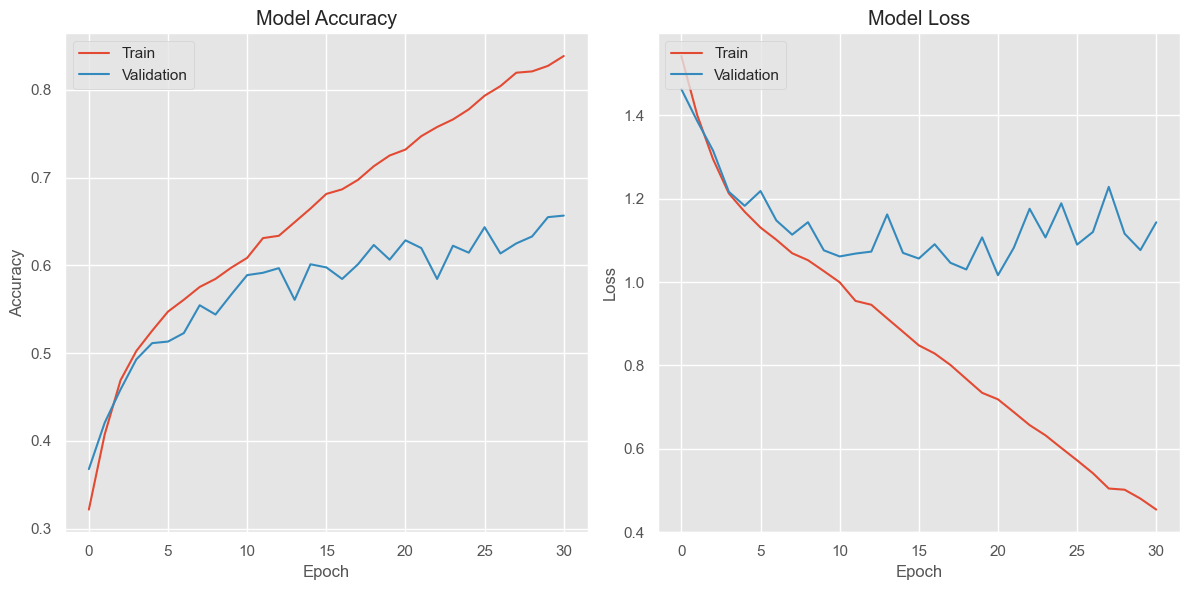

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


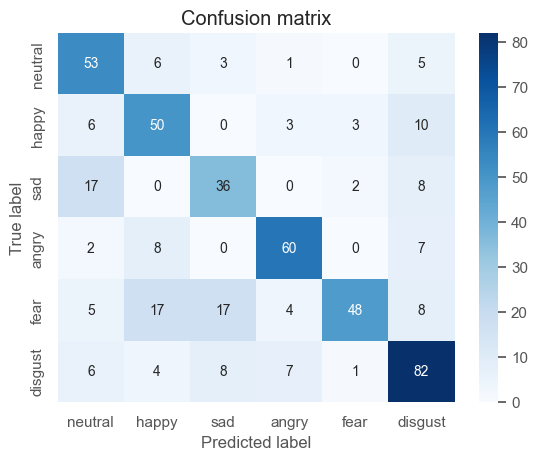

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - categorical_accuracy: 0.6654 - loss: 1.0677
Validation Loss: 1.0699896812438965
Validation Accuracy: 0.675564706325531
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Precision: 0.70412844
Recall: 0.63039017
F1-Score (neutral): 0.67515916
F1-Score (happy): 0.6369426
F1-Score (sad): 0.56692916
F1-Score (angry): 0.7894736
F1-Score (fear): 0.62745094
F1-Score (disgust): 0.71929824
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
[[1.6964128e-08 1.2954770e-02 1.0679132e-04 8.8834125e-01 9.8358639e-02
  2.3862760e-04]]
angry


In [106]:
summarize_history_accuracy(history_CLSTM)
plot_confusion_matrix(X_test, y_test_class, modelCLSTM )
model_info(modelCLSTM, X_test, y_test_class)

pr = modelCLSTM.predict(pda)
print(pr)
emotion_labels = ['neutral', 'happy', 'sad', 'angry', 'fear', 'disgust']
predicted_emotion = emotion_labels[np.argmax(pr)]
print(predicted_emotion)